#**Evaluation**


*   load custom images and classify wearing a mask or not
*   show the test images and prediction or/and scores

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
import os
from torchvision import transforms, datasets
from google.colab.patches import cv2_imshow
import cv2
import torchvision.models as models
from torchvision.transforms.functional import to_pil_image
import numpy as np
import torch.nn as nn
import torchvision

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# 1. prepare data

image_path = "% your data path "
# ImageFolder and data_loader code below


In [ ]:
from google.colab import files
uploaded = files.upload()

1-1, 1-2, 1-3 중 하나만 실행하면 됩니다.(1-3 권장)

In [3]:
# load model and change the # of classes

class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.resnet_50 = models.resnet50(pretrained = False, progress = True)

    num_ftrs = self.resnet_50.fc.in_features
    self.resnet_50.fc = nn.Linear(num_ftrs, 1)
  
  def forward(self, x):
    output = self.resnet_50(x)

    return output

In [4]:
cd '/content/drive/My Drive/IC_PBL_Project_2019009261_GAONCHOI'

/content/drive/My Drive/IC_PBL_Project_2019009261_GAONCHOI


1-1. path를 통해 모델 파일 불러오기

필요한 경우에 한해 경로를 적절히 변경하여 설정하여야 합니다.

In [5]:
# 2. load model
model_weight_path = '/content/drive/MyDrive/IC_PBL_Project_2019009261_GAONCHOI/model_mask_detection.pth'
# model load below and assign device
model = Model().to(device)
model.load_state_dict(torch.load(model_weight_path))

<All keys matched successfully>

1-2. google drive로부터 모델 파일 불러오기

In [ ]:
!gdown --id 1-2X_QL-dMx7Ti-htHbyhL7W-7XqUv8p2

.pth 형식 파일을 아래에 업로드합니다. 오래 걸립니다...

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
model = Model()
model.load_state_dict(torch.load(uploaded))
model.to(device)

In [ ]:
# 3. perform evaluation

In [6]:
from PIL import Image
from google.colab import files
import matplotlib.pyplot as plt
import io

# if .eval() is not used
# the model will output bad value,,,,
model.eval()

def result(tensor_):
  if tensor_.item() >= 0.5:
    return "masked"
  else:
    return "non-masked"

In [ ]:
img_source = files.upload()
img_source = list(img_source.values())[0]
img = Image.open(io.BytesIO(img_source))

img_resize = img.resize((112, 112))

convert_tensor = transforms.ToTensor()
faces = convert_tensor(img_resize).float()
faces = torch.Tensor(faces).to(device)
faces = faces.unsqueeze(0)
faces_output = model(faces)
str1 = 'p={p} -> {result}'.format(p=round(faces_output.item(), 4), result=result(faces_output))

plt.title("Facial Mask Detection")
plt.imshow(img_resize)
plt.xlabel(str1)

In [7]:
!gdown 1PKxNki-5MxXBuTaN8lPdyYDt0c3QMH5p

Downloading...
From: https://drive.google.com/uc?id=1PKxNki-5MxXBuTaN8lPdyYDt0c3QMH5p
To: /content/drive/MyDrive/IC_PBL_Project_2019009261_GAONCHOI/face_image_0.jpg
100% 11.0k/11.0k [00:00<00:00, 21.3MB/s]


In [8]:
!gdown 1RTX-G9G0Nq_cK0y3lWnVY8q4KLgqv0yY

Downloading...
From: https://drive.google.com/uc?id=1RTX-G9G0Nq_cK0y3lWnVY8q4KLgqv0yY
To: /content/drive/MyDrive/IC_PBL_Project_2019009261_GAONCHOI/face_image_0_surgical.jpg
100% 55.7k/55.7k [00:00<00:00, 77.6MB/s]


In [9]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
faces1 = Image.open('/content/drive/MyDrive/IC_PBL_Project_2019009261_GAONCHOI/face_image_0.jpg')
faces2 = Image.open("/content/drive/MyDrive/IC_PBL_Project_2019009261_GAONCHOI/face_image_0_surgical.jpg")

In [10]:
convert_tensor = torchvision.transforms.Compose([
transforms.Resize((112, 112)),
transforms.ToTensor(),
# transforms.Normalize(mean=[0.5033, 0.4229, 0.3915], std=[0.2870, 0.2535, 0.2684])
])
faces_1 = convert_tensor(faces1).float()
faces_1 = np.expand_dims(faces_1, axis=0)
faces_2 = convert_tensor(faces2).float()
faces_2 = np.expand_dims(faces_2, axis=0)

In [11]:
faces_1 = torch.Tensor(faces_1).to(device)
faces_2 = torch.Tensor(faces_2).to(device)

In [12]:
model.eval()
faces1_output = torch.sigmoid(model(faces_1))
faces2_output = torch.sigmoid(model(faces_2))

print(faces1_output, "Result ->", result(faces1_output))
print(faces2_output, "Result ->", result(faces2_output))

str1 = 'p={p} -> {result}'.format(p=round(faces1_output.item(), 5), result=result(faces1_output))
str2 = 'p={p} -> {result}'.format(p=round(faces2_output.item(), 5), result=result(faces2_output))

tensor([[1.8748e-05]], device='cuda:0', grad_fn=<SigmoidBackward0>) Result -> non-masked
tensor([[1.]], device='cuda:0', grad_fn=<SigmoidBackward0>) Result -> masked


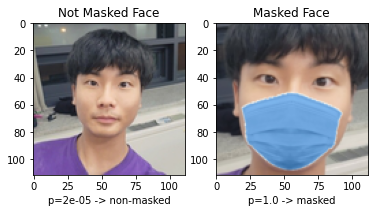

In [13]:
plt.subplot(1, 2, 1)
plt.title("Not Masked Face")
plt.imshow(faces_1.cpu()[0].swapaxes(0, 1).swapaxes(1,2))
plt.xlabel(str1)
plt.subplot(1, 2, 2)
plt.title("Masked Face")
plt.imshow(faces_2.cpu()[0].swapaxes(0, 1).swapaxes(1,2))
plt.xlabel(str2)
# plt.savefig("result.png")
plt.show()